# Purrfect Purrsonalities:
## How Does a Cat's Color and Acquisition Affect His or Her Temperament?
### (And Does This Have the Potential to Increase Cat Adoption?)

---

Because everyone needs an Archie (pictured below)...

<img src="Archie.jpeg" alt="Archie" width="200"/>

## Part One: Cleaning the Survey Results CSV

Survey respondents were promised that any personal information gathered, namely their email address, would not be shared in any publicly visible platform. To keep this promise and to follow data ethics to tbe best of my ability, email addresses in the original respondent CSV file obtained from the Google Form survey were replaced in my very first step of cleaning with an identifying value for the family instead of the email. This was then saved as a new CSV file that will be safe to be posted on GitHub and Tableau and that "safe" file will be used for the remainder of this project. The original CSV with email addresses was deleted  from the repo immediately following cleaning. The code used to do that is shown but hashed out to protect the privacy of all respondents. 

In [1239]:
import pandas as pd
import numpy as np

In [1240]:
# survey_df= pd.read_csv('survey_responses.csv')
# survey_df.head()

In [1241]:
# survey_df.rename(columns={'Email Address' : 'family'}, inplace=True)
# survey_df.head()

In [1242]:
# survey_df.family = pd.factorize(survey_df.family)[0]
# survey_df.head()

In [1243]:
# survey_df.to_csv('survey_data.csv')

Now, let's read in our safe CSV file.

In [1244]:
survey_df = pd.read_csv('survey_data.csv', index_col=[0])
survey_df.head()

,Timestamp,family,"What is your pet's name? (As a reminder, you should submit one separate survey for each cat you have.)",How did you acquire this cat?,"If your cat came from a cat cafe, or if you indicated you adopted this cat from ""Other"", please give the name of the cafe or other adoption/purchase source below:",In which of the following life stages is this cat?,"How long, in years, have you had this cat? (Please round up or round down to the closest whole number.)",Which of these best describes your cat's coat color?,"If your cat's coat was marked as ""Other"", please describe the cat's coloration below:","Approximately how much does your cat weigh, in pounds? (Please use decimals instead of fractions if you know your cat's weight very specifically.)","On a scale from 1 to 10, with 1 being ""scaredy cat"" and 10 being ""social butterfly"", how social is your cat around people?","On a scale from 1 to 10, with 1 being ""Has one brain cell"" and 10 being ""Kitty Einstein"", how intelligent do you think your cat is? (A nice simple quiz you can use to gauge this based on everyday behaviors can be found here.)","On a scale from 1 to 10, with 1 being ""Couch potato"" and 10 being ""Always in motion"", how active/playful is your cat?","On a scale from 1 to 10, with 1 being ""Cat's got his tongue"" and 10 being ""Chatty Cathy"", how vocal is your cat?"
0,6/5/2023 17:07:17,0,Archie,Adopted at a cat cafe,NaN,Adult (3--6 years),4,Orange tabby/orange tabby with white,NaN,15,9,7,6,3
1,6/5/2023 17:15:18,1,Dax,Adopted at a cat cafe,NaN,Junior (7 months--2 years) KITTENS UNDER 1 YEA...,0,Orange tabby/orange tabby with white,NaN,9.5,10,7,9,8
2,6/5/2023 19:54:13,2,Aylin,Acquired through a friend or relative,NaN,Junior (7 months--2 years) KITTENS UNDER 1 YEA...,1,Calico,NaN,7,5,8,6,7
3,6/5/2023 20:17:40,3,Ali,Adopted through animal shelter/rescue group,NaN,Mature (7--10 years),6,Tortoiseshell,NaN,15,2,7,3,5
4,6/5/2023 20:18:42,3,Warner,Adopted through animal shelter/rescue group,NaN,Mature (7--10 years),6,Gray tuxedo (gray and white),NaN,12,9,7,7,10


Because the column names came from the Google Sheet that the survey questions and responses saved into, the column names are currently the full questions from that survey. That simply won't do. Let's make those column names more Pythonic.

In [1245]:
column_names = ['timestamp', 'family', 'name', 'acquired_from', 'place_name', 'age', 'home_duration', 'color',
                 'other_color', 'weight', 'socialness', 'intelligence', 'activity_level', 'vocalization']
survey_df.columns = column_names
survey_df

,timestamp,family,name,acquired_from,place_name,age,home_duration,color,other_color,weight,socialness,intelligence,activity_level,vocalization
0,6/5/2023 17:07:17,0,Archie,Adopted at a cat cafe,NaN,Adult (3--6 years),4,Orange tabby/orange tabby with white,NaN,15,9,7,6,3
1,6/5/2023 17:15:18,1,Dax,Adopted at a cat cafe,NaN,Junior (7 months--2 years) KITTENS UNDER 1 YEA...,0,Orange tabby/orange tabby with white,NaN,9.5,10,7,9,8
2,6/5/2023 19:54:13,2,Aylin,Acquired through a friend or relative,NaN,Junior (7 months--2 years) KITTENS UNDER 1 YEA...,1,Calico,NaN,7,5,8,6,7
3,6/5/2023 20:17:40,3,Ali,Adopted through animal shelter/rescue group,NaN,Mature (7--10 years),6,Tortoiseshell,NaN,15,2,7,3,5
4,6/5/2023 20:18:42,3,Warner,Adopted through animal shelter/rescue group,NaN,Mature (7--10 years),6,Gray tuxedo (gray and white),NaN,12,9,7,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,6/13/2023 19:54:33,255,Cash,Found as a stray,NaN,Junior (7 months--2 years) KITTENS UNDER 1 YEA...,1,Solid black,NaN,7,3,10,4,8
473,6/13/2023 19:56:02,255,Penny,Adopted through animal shelter/rescue group,NaN,Junior (7 months--2 years) KITTENS UNDER 1 YEA...,1,Brown tabby/brown tabby with white,NaN,8,1,5,2,3
474,7/6/2023 11:41:41,256,Morty,Adopted at a cat cafe,NaN,Adult (3--6 years),4,Solid black,NaN,12,1,1,2,10
475,7/6/2023 11:46:57,256,Indiana,Adopted at a cat cafe,NaN,Adult (3--6 years),4,Orange tabby/orange tabby with white,NaN,15,5,8,3,2


We do not need the timestamp column, and the place_name column came from a previous iteration of the survey that was later scrapped. It asked respondents to name the place where their cat was adopted. Let's delete those columns and get some information about our DataFrame. 

In [1246]:
survey_df.drop(['timestamp', 'place_name'], axis=1, inplace=True)
survey_df.head()

,family,name,acquired_from,age,home_duration,color,other_color,weight,socialness,intelligence,activity_level,vocalization
0,0,Archie,Adopted at a cat cafe,Adult (3--6 years),4,Orange tabby/orange tabby with white,NaN,15,9,7,6,3
1,1,Dax,Adopted at a cat cafe,Junior (7 months--2 years) KITTENS UNDER 1 YEA...,0,Orange tabby/orange tabby with white,NaN,9.5,10,7,9,8
2,2,Aylin,Acquired through a friend or relative,Junior (7 months--2 years) KITTENS UNDER 1 YEA...,1,Calico,NaN,7,5,8,6,7
3,3,Ali,Adopted through animal shelter/rescue group,Mature (7--10 years),6,Tortoiseshell,NaN,15,2,7,3,5
4,3,Warner,Adopted through animal shelter/rescue group,Mature (7--10 years),6,Gray tuxedo (gray and white),NaN,12,9,7,7,10


In [1247]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 476
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   family          477 non-null    int64 
 1   name            477 non-null    object
 2   acquired_from   477 non-null    object
 3   age             477 non-null    object
 4   home_duration   477 non-null    object
 5   color           477 non-null    object
 6   other_color     46 non-null     object
 7   weight          477 non-null    object
 8   socialness      477 non-null    int64 
 9   intelligence    477 non-null    int64 
 10  activity_level  477 non-null    int64 
 11  vocalization    477 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 48.4+ KB


In [1248]:
survey_df.shape

(477, 12)

Respondents were asked to give their cat's weight in pounds, rounding to the nearest pound, but that is showing as an object and not an integer data type. What's going on there?

In [1249]:
print(survey_df['weight'].unique())

['15' '9.5' '7' '12' '8.6' '8 lbs' '13 pounds' '13' '16lbs' '7 lbs' '6lbs'
 '11' '9' '5' '2' '14.7' '10' '10 pounds' '12 lbs' '8' '3.5' '14 lbs'
 '9lbs' '13 lbs' '9.14' '20 lbs' '12 pounds' '17' '8.5' '6 lbs'
 '12.50 pounds' '14' '7 pounds' '15 pounds' '20' '12.5 lbs' 'Ginger 3 lbs'
 '16' '15.5' '6.5' '5.5' '11.5' 'No idea but he’s a smol kitteh' '25'
 '13lbs' '18 lbs' 'No idea ' '14lbs' '7lbs' '8.4 lbs' '8-15 pounds'
 'Grey and white tuxedo cat' '6.4' '16 lbs' '?' '18' '9.3 pounds'
 '6.8 pounds' '9 pounds' '5 pounds' '3 lbs' '12 LBS' '6 pounds 8 ounces'
 '6 pounds' '6.5 pounds' '8.2' '11.8' 'I don’t know. ' '21' '10 lbs'
 '17 pounds' '8.8' 'Brown and black tabby' '3' '10.73 lb ' '8.73 lb '
 '7.5 pounds ' '13.6' '9 lbs' '8lb' 'No idea' 'not sure' '17 lbs' '6' '4'
 'Less then a pound' '5 lbs' '24 lbs' '9.6' '9.8' '7.5' '7.2' '8lbs'
 '11.1 lbs' '8 pounds' '8 poundspp' '17.6'
 "I don't know and I'm bad at guessing these things!"
 "I'm not sure and I would hate to guess!" '9 pounds no' '13

In case we need to do calculations later based on feline chonkiness, we need to make the weight column an integer data type. Let's get rid of all non-number values in that Series. 

In [1250]:
survey_df['weight'] = survey_df['weight'].str.extract(pat='(\d+)', expand=False)
print(survey_df['weight'].unique())

['15' '9' '7' '12' '8' '13' '16' '6' '11' '5' '2' '14' '10' '3' '20' '17'
 nan '25' '18' '21' '4' '24' '22' '28' '23' '19' '112']


We do have some null values, which will keep us from changing the weight column to an integer type as I'd like. We can convert it to a nullable integer type, however, by using "Int64" instead of "int". 

In [1251]:
survey_df.weight = survey_df.weight.astype('Int64')

In [1252]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 476
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   family          477 non-null    int64 
 1   name            477 non-null    object
 2   acquired_from   477 non-null    object
 3   age             477 non-null    object
 4   home_duration   477 non-null    object
 5   color           477 non-null    object
 6   other_color     46 non-null     object
 7   weight          464 non-null    Int64 
 8   socialness      477 non-null    int64 
 9   intelligence    477 non-null    int64 
 10  activity_level  477 non-null    int64 
 11  vocalization    477 non-null    int64 
dtypes: Int64(1), int64(5), object(6)
memory usage: 48.9+ KB


The survey included an "Other" drop-down option for the cat's coat color, which led respondents to a short-answer question on the Form where they could describe their cat's unconventional coat color. To simplify that cat's coat color into just one column, I need to first replace null values with an empty string, then move any values left in the other_color column to the color column, replacing anything in the color column (this would have shown up as just the string "other") with the value from the other_color column IF there isn't an empty string in the other_color column. Along the way I'll check to see what strings are in the other_color column, and then to check to see if this worked I'll print the first 50 rows of the DataFrame to get a good representation of how the values transferred.

In [1253]:
survey_df.other_color = survey_df.other_color.fillna('')


In [1254]:
print(survey_df['other_color'].unique())

['' 'ocicat tabby mix' 'ocicat marble tabby mix' 'abyssian tabby mix'
 'Blonde with tabby markings on the head' 'Snowshoe Siamese '
 'Grey and white long hair' 'White with orange spots'
 'Tabby-tortie or torbie'
 'Red flame, orange tips on ears, orange strips on tail'
 'Grays, orange, white, no cat color fits her'
 'Black with brown/gray stripe marking, brown belly'
 'Black with white spots '
 'Belly, legs and bottom half of his body is white. His back and some of the sides of his body are black.'
 'Mostly white with black spots' 'Brown/orange/white Torby'
 'Part orange tabby, part calico' 'Chocolate tabby point Siamese '
 'Mostly white with a few large brown spots (including a heart on shoulder)'
 'She is a calico and a tabby ' 'Black and white splotches, not tuxedo'
 'almost all white but black tail, and partly black on head and face '
 'White with brown and black spots' 'Hes a cream tabby'
 'Fire point siamese' 'Long hair black and white marbled (non-tuxedo)'
 'Long hair gray with w

In [1255]:
survey_df['color'] = survey_df['other_color'].where(survey_df['other_color'].ne(''), survey_df['color'])
survey_df.head(50)

,family,name,acquired_from,age,home_duration,color,other_color,weight,socialness,intelligence,activity_level,vocalization
0,0,Archie,Adopted at a cat cafe,Adult (3--6 years),4,Orange tabby/orange tabby with white,,15,9,7,6,3
1,1,Dax,Adopted at a cat cafe,Junior (7 months--2 years) KITTENS UNDER 1 YEA...,0,Orange tabby/orange tabby with white,,9,10,7,9,8
2,2,Aylin,Acquired through a friend or relative,Junior (7 months--2 years) KITTENS UNDER 1 YEA...,1,Calico,,7,5,8,6,7
3,3,Ali,Adopted through animal shelter/rescue group,Mature (7--10 years),6,Tortoiseshell,,15,2,7,3,5
4,3,Warner,Adopted through animal shelter/rescue group,Mature (7--10 years),6,Gray tuxedo (gray and white),,12,9,7,7,10
5,4,Cleo,Acquired through a friend or relative,Super Senior (15 years+),16,Solid black,,8,4,6,2,3
6,5,Cinnamon,Adopted through animal shelter/rescue group,Adult (3--6 years),3 years,Brown tabby/brown tabby with white,,8,8,6,7,9
7,6,Patti LaBelle,Adopted through animal shelter/rescue group,Adult (3--6 years),2,Brown tabby/brown tabby with white,,13,5,8,4,10
8,7,Claire,Adopted through animal shelter/rescue group,Senior (11-14 years),14,Calico,,13,10,8,3,8
9,8,Charlie,Found as a stray,Mature (7--10 years),10 years,Classic tuxedo (black and white),,16,10,3,2,1


Since that seems to have worked, we can delete the other_color column.

In [1256]:
survey_df.drop(['other_color'], axis=1, inplace=True)
survey_df.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
0,0,Archie,Adopted at a cat cafe,Adult (3--6 years),4,Orange tabby/orange tabby with white,15,9,7,6,3
1,1,Dax,Adopted at a cat cafe,Junior (7 months--2 years) KITTENS UNDER 1 YEA...,0,Orange tabby/orange tabby with white,9,10,7,9,8
2,2,Aylin,Acquired through a friend or relative,Junior (7 months--2 years) KITTENS UNDER 1 YEA...,1,Calico,7,5,8,6,7
3,3,Ali,Adopted through animal shelter/rescue group,Mature (7--10 years),6,Tortoiseshell,15,2,7,3,5
4,3,Warner,Adopted through animal shelter/rescue group,Mature (7--10 years),6,Gray tuxedo (gray and white),12,9,7,7,10


Next, I want the cat's age column to be simpler to read and do calculations with. Let's get rid of every value in that column that comes after the age classification (Mature, Adult, Senior, etc.) The ranges included in these classifications can be given later in any results write-ups and visualizations. 

In [1257]:
survey_df['age'] = survey_df['age'].str.split('(').str[0]
survey_df.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
0,0,Archie,Adopted at a cat cafe,Adult,4,Orange tabby/orange tabby with white,15,9,7,6,3
1,1,Dax,Adopted at a cat cafe,Junior,0,Orange tabby/orange tabby with white,9,10,7,9,8
2,2,Aylin,Acquired through a friend or relative,Junior,1,Calico,7,5,8,6,7
3,3,Ali,Adopted through animal shelter/rescue group,Mature,6,Tortoiseshell,15,2,7,3,5
4,3,Warner,Adopted through animal shelter/rescue group,Mature,6,Gray tuxedo (gray and white),12,9,7,7,10


We similarly need to simplify where/how the cats were acquired. These were drop-down-menu choices on the survey, so there aren't too many possible unique values in that column. We can create a dictionary to make these replacements as more Pythonic strings.

In [1258]:
print(survey_df['acquired_from'].unique())

['Adopted at a cat cafe' 'Acquired through a friend or relative'
 'Adopted through animal shelter/rescue group' 'Found as a stray'
 'Purchased from a pet store' 'Received as a gift'
 'Purchased from a breeder' 'Bred at home/from owned pet']


In [1259]:
replacement_dict = {
    'Adopted at a cat cafe' : 'cat_cafe',
    'Acquired through a friend or relative' : 'friend_or_relative',
    'Adopted through animal shelter/rescue group' : 'shelter_or_rescue',
    'Found as a stray' : 'stray',
    'Purchased from a pet store' : 'pet_store',
    'Received as a gift' : 'gift',
    'Purchased from a breeder' : 'breeder',
    'Bred at home/from owned pet' : 'from_owned_pet'
}
survey_df['acquired_from'] = survey_df['acquired_from'].replace(replacement_dict)
print(survey_df['acquired_from'].unique())

['cat_cafe' 'friend_or_relative' 'shelter_or_rescue' 'stray' 'pet_store'
 'gift' 'breeder' 'from_owned_pet']


Since this was a survey, it's quite possible there are accidental duplicates. If there are duplicates, they can be easily detected by searching on the family and name columns. If there are duplicates there, we should keep the last duplicate; when people submit two copies of a survey, it's often because they didn't answer the way they wanted to on the first submission and are re-doing it. Keeping the last duplicate gives us a better shot at accurate data.

In [1260]:
duplicate_rows = survey_df[survey_df.duplicated(['family', 'name'])]
duplicate_rows

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
23,10,Pandora,stray,Adult,6,Calico,14,3,9,2,2
359,129,Theo,gift,Adult,4,Classic tuxedo (black and white),12,8,2,5,5


In [1261]:
survey_df.drop_duplicates(subset=['family', 'name'], keep='last', inplace=True)
survey_df.shape

(475, 11)

One more thing, and I discovered this later in the project and had to come back in time to fix it here--we need to get rid of the parentheses in the color column. Regex values and all that.

Trust me.

In [1262]:
survey_df['color'] = survey_df['color'].str.replace("\(|\)", "", regex=True)
survey_df

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
0,0,Archie,cat_cafe,Adult,4,Orange tabby/orange tabby with white,15,9,7,6,3
1,1,Dax,cat_cafe,Junior,0,Orange tabby/orange tabby with white,9,10,7,9,8
2,2,Aylin,friend_or_relative,Junior,1,Calico,7,5,8,6,7
3,3,Ali,shelter_or_rescue,Mature,6,Tortoiseshell,15,2,7,3,5
4,3,Warner,shelter_or_rescue,Mature,6,Gray tuxedo gray and white,12,9,7,7,10
...,...,...,...,...,...,...,...,...,...,...,...
472,255,Cash,stray,Junior,1,Solid black,7,3,10,4,8
473,255,Penny,shelter_or_rescue,Junior,1,Brown tabby/brown tabby with white,8,1,5,2,3
474,256,Morty,cat_cafe,Adult,4,Solid black,12,1,1,2,10
475,256,Indiana,cat_cafe,Adult,4,Orange tabby/orange tabby with white,15,5,8,3,2


Finally, let's save a clean copy of this CSV file to be used for further analysis and for visualization tools later in the project.

In [1263]:
survey_df.to_csv('clean_survey_data.csv')

## Part Two: Cleaning the Excel Data from Boone County Animal Control Center

Our second DataFrame will be pulled from an Excel file of cat and kitten adoptions from Boone County Animal Control Center in Boone County, Kentucky. The data only includes feline adoptions, not intakes and not other animal species. So some of our filtering is already done for us. I also asked that the cat's color be included. Later, we will join this DataFrame with our cat owner survery DataFrame to try to make some predictions: are there certain behavior characteristics we can expect from these shelter cats based on how they were adopted and their coat color?

First, let's bring in the file and check out the head and tail.

In [1264]:
bcacc_df = pd.read_excel('BCACC_2022 Cat Adoptions-Color.xlsx')

In [1265]:
print(bcacc_df.shape)
bcacc_df

(481, 16)


,Unnamed: 0,Unnamed: 1,Animal Status Report,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,Date Generated:,Jun 23 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,From:,1-Jan-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,To:,31-Dec-2022 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Type:,"Cat, Kitten",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Status:,"Adopted, Adopted Altered, Adopted Offsite(Unal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,52350,2022-06-28 15:27:00,NaN,NaN,Adopted,NaN,NaN,NaN,NaN,Boone County Animal Shelter,Kitten,Domestic Short Hair,NaN,Black \nTortoiseshell,NaN,Slinky
477,52350,2022-06-28 15:27:00,NaN,NaN,Adopted,NaN,NaN,NaN,NaN,Boone County Animal Shelter,Kitten,Domestic Short Hair,NaN,Black \nTortoiseshell,NaN,Slinky
478,52351,2022-06-29 14:12:00,NaN,NaN,Adopted,NaN,NaN,NaN,NaN,Boone County Animal Shelter,Kitten,Domestic Short Hair,NaN,Black \nTortoiseshell,NaN,Wheezy
479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is clearly a partially non-tabular DataFrame. Let's fix that. First, let's see where it gets "weird" by looking at the first 20 rows.

In [1266]:
bcacc_df.head(20)

,Unnamed: 0,Unnamed: 1,Animal Status Report,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,Date Generated:,Jun 23 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,From:,1-Jan-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,To:,31-Dec-2022 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Type:,"Cat, Kitten",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Status:,"Adopted, Adopted Altered, Adopted Offsite(Unal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,Region:,All,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Sub-Status:,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,Sources:,All,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Date Field for Date \nRange:,Status Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After looking here and at the source document in Excel, I can see that there is some formatting at the beginning of the Excel document that simply specifies the parameters the animal shelter director used to run the report. They are not needed data. This can be dropped.

In [1267]:
bcacc_df2 = bcacc_df.iloc[11:]
bcacc_df2

,Unnamed: 0,Unnamed: 1,Animal Status Report,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
11,Animal ID,Status Date,Date Out Of Status,Days In Status,Status,NaN,Sub Status,NaN,Next Status,Physical Location,Type,Breed,Age,Primary colour,Secondary \ncolour,Name
12,53880,2022-12-06 14:16:00,NaN,NaN,Adopted,NaN,NaN,NaN,NaN,Boone County Animal Shelter,Cat,Bombay,8 Years 7 Months 1 Week (approx),Black,Brown,Faith
13,54032,2022-12-15 12:55:00,NaN,NaN,Adopted,NaN,NaN,NaN,NaN,Boone County Animal Shelter,Kitten,Domestic Longhair,8 Months 2 Weeks,Grey,NaN,Prancer
14,52904,2022-08-12 15:36:00,NaN,NaN,Adopted,NaN,NaN,NaN,NaN,Boone County Animal Shelter,Cat,Domestic Longhair,3 Years 10 Months 3 Weeks (approx),Black,White,Gabriel
15,52975,2022-08-18 17:34:00,2022-12-30 16:00:00,134,Adopted,NaN,NaN,NaN,Available For Adoption,Boone County Animal Shelter,Cat,Domestic Longhair,1 Year 4 Months 1 Week (approx),Black,White,Zora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,52350,2022-06-28 15:27:00,NaN,NaN,Adopted,NaN,NaN,NaN,NaN,Boone County Animal Shelter,Kitten,Domestic Short Hair,NaN,Black \nTortoiseshell,NaN,Slinky
477,52350,2022-06-28 15:27:00,NaN,NaN,Adopted,NaN,NaN,NaN,NaN,Boone County Animal Shelter,Kitten,Domestic Short Hair,NaN,Black \nTortoiseshell,NaN,Slinky
478,52351,2022-06-29 14:12:00,NaN,NaN,Adopted,NaN,NaN,NaN,NaN,Boone County Animal Shelter,Kitten,Domestic Short Hair,NaN,Black \nTortoiseshell,NaN,Wheezy
479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The column headings from the body of the Excel file are seen here at row 11. Two columns, at index positions 5 and 7, seem to have no data in them and don't correlate with any columns from the source document. Those can be dropped.

In [1268]:
bcacc_df3 = bcacc_df2.drop(bcacc_df2.columns[[5, 7]], axis=1)
bcacc_df3.head()

,Unnamed: 0,Unnamed: 1,Animal Status Report,Unnamed: 3,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
11,Animal ID,Status Date,Date Out Of Status,Days In Status,Status,Sub Status,Next Status,Physical Location,Type,Breed,Age,Primary colour,Secondary \ncolour,Name
12,53880,2022-12-06 14:16:00,NaN,NaN,Adopted,NaN,NaN,Boone County Animal Shelter,Cat,Bombay,8 Years 7 Months 1 Week (approx),Black,Brown,Faith
13,54032,2022-12-15 12:55:00,NaN,NaN,Adopted,NaN,NaN,Boone County Animal Shelter,Kitten,Domestic Longhair,8 Months 2 Weeks,Grey,NaN,Prancer
14,52904,2022-08-12 15:36:00,NaN,NaN,Adopted,NaN,NaN,Boone County Animal Shelter,Cat,Domestic Longhair,3 Years 10 Months 3 Weeks (approx),Black,White,Gabriel
15,52975,2022-08-18 17:34:00,2022-12-30 16:00:00,134,Adopted,NaN,Available For Adoption,Boone County Animal Shelter,Cat,Domestic Longhair,1 Year 4 Months 1 Week (approx),Black,White,Zora


Because we eliminated the first ten rows of the original DataFrame, the new DataFrame doesn't know what the column names are. Let's fix that. 

In [1269]:
bcacc_df3.rename(columns={bcacc_df3.columns[0]: 'animal_id', bcacc_df3.columns[1]: 'status_date', bcacc_df3.columns[2]: 'date_out', 
                   bcacc_df3.columns[3]: 'days_in', bcacc_df3.columns[4]: 'status', bcacc_df3.columns[5]: 'sub_status', 
                    bcacc_df3.columns[6]: 'next_status', bcacc_df3.columns[7]: 'location', bcacc_df3.columns[8]: 'type',
                     bcacc_df3.columns[9]: 'breed', bcacc_df3.columns[10]: 'age', bcacc_df3.columns[11]: 'primary_color',
                      bcacc_df3.columns[12]: 'secondary_color', bcacc_df3.columns[13]: 'name'}, inplace=True)
print(bcacc_df3.columns)

Index(['animal_id', 'status_date', 'date_out', 'days_in', 'status',
       'sub_status', 'next_status', 'location', 'type', 'breed', 'age',
       'primary_color', 'secondary_color', 'name'],
      dtype='object')


In [1270]:
bcacc_df3.head()

,animal_id,status_date,date_out,days_in,status,sub_status,next_status,location,type,breed,age,primary_color,secondary_color,name
11,Animal ID,Status Date,Date Out Of Status,Days In Status,Status,Sub Status,Next Status,Physical Location,Type,Breed,Age,Primary colour,Secondary \ncolour,Name
12,53880,2022-12-06 14:16:00,NaN,NaN,Adopted,NaN,NaN,Boone County Animal Shelter,Cat,Bombay,8 Years 7 Months 1 Week (approx),Black,Brown,Faith
13,54032,2022-12-15 12:55:00,NaN,NaN,Adopted,NaN,NaN,Boone County Animal Shelter,Kitten,Domestic Longhair,8 Months 2 Weeks,Grey,NaN,Prancer
14,52904,2022-08-12 15:36:00,NaN,NaN,Adopted,NaN,NaN,Boone County Animal Shelter,Cat,Domestic Longhair,3 Years 10 Months 3 Weeks (approx),Black,White,Gabriel
15,52975,2022-08-18 17:34:00,2022-12-30 16:00:00,134,Adopted,NaN,Available For Adoption,Boone County Animal Shelter,Cat,Domestic Longhair,1 Year 4 Months 1 Week (approx),Black,White,Zora


With our new column names matching up (while being more Pythonic) with the column names in row 11 from the source data, we can now delete row 11 (which is actually the first row of our new DataFrame.)

In [1271]:
bcacc_df3.drop(index=bcacc_df3.index[0], axis=0, inplace=True)
bcacc_df3.head()

,animal_id,status_date,date_out,days_in,status,sub_status,next_status,location,type,breed,age,primary_color,secondary_color,name
12,53880,2022-12-06 14:16:00,NaN,NaN,Adopted,NaN,NaN,Boone County Animal Shelter,Cat,Bombay,8 Years 7 Months 1 Week (approx),Black,Brown,Faith
13,54032,2022-12-15 12:55:00,NaN,NaN,Adopted,NaN,NaN,Boone County Animal Shelter,Kitten,Domestic Longhair,8 Months 2 Weeks,Grey,NaN,Prancer
14,52904,2022-08-12 15:36:00,NaN,NaN,Adopted,NaN,NaN,Boone County Animal Shelter,Cat,Domestic Longhair,3 Years 10 Months 3 Weeks (approx),Black,White,Gabriel
15,52975,2022-08-18 17:34:00,2022-12-30 16:00:00,134,Adopted,NaN,Available For Adoption,Boone County Animal Shelter,Cat,Domestic Longhair,1 Year 4 Months 1 Week (approx),Black,White,Zora
16,53454,2022-10-20 15:56:00,NaN,NaN,Adopted Altered,NaN,NaN,Boone County Animal Shelter,Cat,Domestic Longhair,1 Year 8 Months 1 Week (approx),Black,White,Frisky


But we do have to reset the index now.

In [1272]:
bcacc_df3 = bcacc_df3.reset_index(drop=True)
bcacc_df3.head()

,animal_id,status_date,date_out,days_in,status,sub_status,next_status,location,type,breed,age,primary_color,secondary_color,name
0,53880,2022-12-06 14:16:00,NaN,NaN,Adopted,NaN,NaN,Boone County Animal Shelter,Cat,Bombay,8 Years 7 Months 1 Week (approx),Black,Brown,Faith
1,54032,2022-12-15 12:55:00,NaN,NaN,Adopted,NaN,NaN,Boone County Animal Shelter,Kitten,Domestic Longhair,8 Months 2 Weeks,Grey,NaN,Prancer
2,52904,2022-08-12 15:36:00,NaN,NaN,Adopted,NaN,NaN,Boone County Animal Shelter,Cat,Domestic Longhair,3 Years 10 Months 3 Weeks (approx),Black,White,Gabriel
3,52975,2022-08-18 17:34:00,2022-12-30 16:00:00,134,Adopted,NaN,Available For Adoption,Boone County Animal Shelter,Cat,Domestic Longhair,1 Year 4 Months 1 Week (approx),Black,White,Zora
4,53454,2022-10-20 15:56:00,NaN,NaN,Adopted Altered,NaN,NaN,Boone County Animal Shelter,Cat,Domestic Longhair,1 Year 8 Months 1 Week (approx),Black,White,Frisky


Before we go any further, let's check for duplicates. We will do a broad check for duplicates across all rows and delete those. 

In [1273]:
bcacc_df3.drop_duplicates()
bcacc_df3.shape

(469, 14)

Because we are primarily looking at where a cat was acquired and how it may affect the animal's personality, and a cat's color to see if it affects the same, we can delete some unnecessary columns here to help join it with the survery DataFrame. All of there animals were adopted, but we will keep that column but change all the values to match "shelter_or_rescue" values in the other DataFrame. 

In [1274]:
bcacc_final = bcacc_df3.filter(['status', 'primary_color', 'secondary_color', 'name'], axis=1)
bcacc_final.head()

,status,primary_color,secondary_color,name
0,Adopted,Black,Brown,Faith
1,Adopted,Grey,NaN,Prancer
2,Adopted,Black,White,Gabriel
3,Adopted,Black,White,Zora
4,Adopted Altered,Black,White,Frisky


In [1275]:
print(bcacc_final['status'].unique())

['Adopted' 'Adopted Altered' 'Adopted Offsite' nan]


In [1276]:
bcacc_final = bcacc_final.assign(status='shelter_or_rescue')
bcacc_final.head()

,status,primary_color,secondary_color,name
0,shelter_or_rescue,Black,Brown,Faith
1,shelter_or_rescue,Grey,NaN,Prancer
2,shelter_or_rescue,Black,White,Gabriel
3,shelter_or_rescue,Black,White,Zora
4,shelter_or_rescue,Black,White,Frisky


In [1277]:
bcacc_final.secondary_color = bcacc_final.secondary_color.fillna('')
bcacc_final.head()


,status,primary_color,secondary_color,name
0,shelter_or_rescue,Black,Brown,Faith
1,shelter_or_rescue,Grey,,Prancer
2,shelter_or_rescue,Black,White,Gabriel
3,shelter_or_rescue,Black,White,Zora
4,shelter_or_rescue,Black,White,Frisky


In [1278]:
bcacc_final['full_color'] = bcacc_final['primary_color'] + ' ' + bcacc_final['secondary_color']
bcacc_final.head()

,status,primary_color,secondary_color,name,full_color
0,shelter_or_rescue,Black,Brown,Faith,Black Brown
1,shelter_or_rescue,Grey,,Prancer,Grey
2,shelter_or_rescue,Black,White,Gabriel,Black White
3,shelter_or_rescue,Black,White,Zora,Black White
4,shelter_or_rescue,Black,White,Frisky,Black White


Let's save this cleaned file for later visualizations. 

In [1279]:
bcacc_final.to_csv('clean_bcacc_data.csv')

## Step Three: Scraping a Table from HumanePro

As I was thinking about this project and seeing what data was already out there, the "Pets by the Numbers" page from HumanePro provided some good statistics to get me started. In fact, I used their categories for where a pet was acquired, from their published survey, as my categoies for where a cat was acquired in my survey. I want to see if my dataset numbers for the breakdown of pet acquisition matches their dataset in a later step. 

In [1280]:
url = 'https://humanepro.org/page/pets-by-the-numbers'
humane_df = pd.read_html(url)


Check to see how many tables are showing:

In [1281]:
len(humane_df)

5

My target table is the 4th one on this page, so let's grab it:

In [1282]:
humane_df = humane_df[3]
humane_df

,Fact,2017-2018 AVMA Sourcebook,2021-2022 APPA Survey
0,Dogs adopted from an animal shelter/humane soc...,28%,40%
1,Cats adopted from an animal shelter or rescue ...,31%,43%
2,Dogs taken in as strays or caught outside,5%,4%
3,Cats taken in as strays or caught outside,25%,24%
4,Dogs acquired from friends or relatives,26%,18%
5,Cats acquired from friends or relatives,25%,21%
6,Dogs purchased from a pet store,6%,9%
7,Cats purchased from a pet store,3%,8%
8,Dogs purchased from a breeder,22%,21%
9,Cats purchased from a breeder,3%,4%


When we join these later to compare notes, I will want to join on the "acquired_from" Series. Let's make sure our naming and values in this column match the survey DataFrame.

In [1283]:
humane_df.columns = ['acquired_from', '2017-2018', '2021-2022']
humane_df.head()

,acquired_from,2017-2018,2021-2022
0,Dogs adopted from an animal shelter/humane soc...,28%,40%
1,Cats adopted from an animal shelter or rescue ...,31%,43%
2,Dogs taken in as strays or caught outside,5%,4%
3,Cats taken in as strays or caught outside,25%,24%
4,Dogs acquired from friends or relatives,26%,18%


Isolate the cat data:

In [1284]:
to_drop = humane_df[humane_df['acquired_from'].str.contains('Dogs')].index
humane_df.drop(to_drop, inplace=True)
humane_df

,acquired_from,2017-2018,2021-2022
1,Cats adopted from an animal shelter or rescue ...,31%,43%
3,Cats taken in as strays or caught outside,25%,24%
5,Cats acquired from friends or relatives,25%,21%
7,Cats purchased from a pet store,3%,8%
9,Cats purchased from a breeder,3%,4%
11,Cats bred at home/from owned pet,NaN,7%
13,Cats received as a gift,NaN,3%


And change the values to match those in survey_df:

In [1285]:
replacement_dict2 = {
    'Cats acquired from friends or relatives' : 'friend_or_relative',
    'Cats adopted from an animal shelter or rescue group (may include adoptions via pet stores)' : 'shelter_or_rescue',
    'Cats taken in as strays or caught outside' : 'stray',
    'Cats purchased from a pet store' : 'pet_store',
    'Cats received as a gift' : 'gift',
    'Cats purchased from a breeder' : 'breeder',
    'Cats bred at home/from owned pet' : 'from_owned_pet'
}
humane_df['acquired_from'] = humane_df['acquired_from'].replace(replacement_dict2)
humane_df

,acquired_from,2017-2018,2021-2022
1,shelter_or_rescue,31%,43%
3,stray,25%,24%
5,friend_or_relative,25%,21%
7,pet_store,3%,8%
9,breeder,3%,4%
11,from_owned_pet,NaN,7%
13,gift,NaN,3%


In [1286]:
humane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 1 to 13
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   acquired_from  7 non-null      object
 1   2017-2018      5 non-null      object
 2   2021-2022      7 non-null      object
dtypes: object(3)
memory usage: 300.0+ bytes


Our last bit of cleaning with this DataFrame will be making sure the "2017-2018" and "2021-2022" columns are of data type "float"; when we join this DataFrame with the survey data to see how the "acquired_from" numbers match up, we will be converting those numbers to a percentage, shown as a float.

In [1287]:
humane_df['2017-2018'] = humane_df['2017-2018'].str.rstrip('%').astype('float')
humane_df['2021-2022'] = humane_df['2021-2022'].str.rstrip('%').astype('float')

In [1288]:
humane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 1 to 13
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   acquired_from  7 non-null      object 
 1   2017-2018      5 non-null      float64
 2   2021-2022      7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 300.0+ bytes


In [1289]:
humane_df

,acquired_from,2017-2018,2021-2022
1,shelter_or_rescue,31.0,43.0
3,stray,25.0,24.0
5,friend_or_relative,25.0,21.0
7,pet_store,3.0,8.0
9,breeder,3.0,4.0
11,from_owned_pet,NaN,7.0
13,gift,NaN,3.0


## Step Four: Joining the Survey Data to the HumanePro Data To Check Trends

It wouldn't hurt to check to see if our breakdown of where the cats were acquired from our survey lines up with the years surveyed in the HumanePro data. It would also be interesting to see what the trends in cat adoption/purchase have been over recent years, especially given the spike in all pet adoptions during the COVID-19 lockdowns. 

Let's start by looking at the survey DataFrame and isolating the acquired_from column, and then converting the occurrences to percetages.

In [1290]:
survey_df.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
0,0,Archie,cat_cafe,Adult,4,Orange tabby/orange tabby with white,15,9,7,6,3
1,1,Dax,cat_cafe,Junior,0,Orange tabby/orange tabby with white,9,10,7,9,8
2,2,Aylin,friend_or_relative,Junior,1,Calico,7,5,8,6,7
3,3,Ali,shelter_or_rescue,Mature,6,Tortoiseshell,15,2,7,3,5
4,3,Warner,shelter_or_rescue,Mature,6,Gray tuxedo gray and white,12,9,7,7,10


In [1291]:
acquired_from_series = (survey_df['acquired_from'].value_counts()/len(survey_df) * 100)
acquired_from_series = acquired_from_series.round(1)
print(acquired_from_series)

acquired_from
shelter_or_rescue     34.3
stray                 29.7
friend_or_relative    24.0
cat_cafe               6.3
breeder                1.9
gift                   1.7
pet_store              1.5
from_owned_pet         0.6
Name: count, dtype: float64


In [1292]:
acquired_from_df = acquired_from_series.to_frame().reset_index()
acquired_from_df =acquired_from_df.rename(columns={'count' : '2023_survey'})
acquired_from_df

,acquired_from,2023_survey
0,shelter_or_rescue,34.3
1,stray,29.7
2,friend_or_relative,24.0
3,cat_cafe,6.3
4,breeder,1.9
5,gift,1.7
6,pet_store,1.5
7,from_owned_pet,0.6


This does everything we need to to next join our survey data with the survey data from HumanePro.

In [1293]:
acquired_summary = pd.merge(acquired_from_df, humane_df, how='left', on='acquired_from')
acquired_summary

,acquired_from,2023_survey,2017-2018,2021-2022
0,shelter_or_rescue,34.3,31.0,43.0
1,stray,29.7,25.0,24.0
2,friend_or_relative,24.0,25.0,21.0
3,cat_cafe,6.3,NaN,NaN
4,breeder,1.9,3.0,4.0
5,gift,1.7,NaN,3.0
6,pet_store,1.5,3.0,8.0
7,from_owned_pet,0.6,NaN,7.0


Let's put the columns in chronological order.

In [1294]:
acquired_summary = acquired_summary[['acquired_from', '2017-2018', '2021-2022', '2023_survey']]
acquired_summary

,acquired_from,2017-2018,2021-2022,2023_survey
0,shelter_or_rescue,31.0,43.0,34.3
1,stray,25.0,24.0,29.7
2,friend_or_relative,25.0,21.0,24.0
3,cat_cafe,NaN,NaN,6.3
4,breeder,3.0,4.0,1.9
5,gift,NaN,3.0,1.7
6,pet_store,3.0,8.0,1.5
7,from_owned_pet,NaN,7.0,0.6


Let's do a quick plot to have a visual for easier comparison:

In [1295]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='acquired_from'>

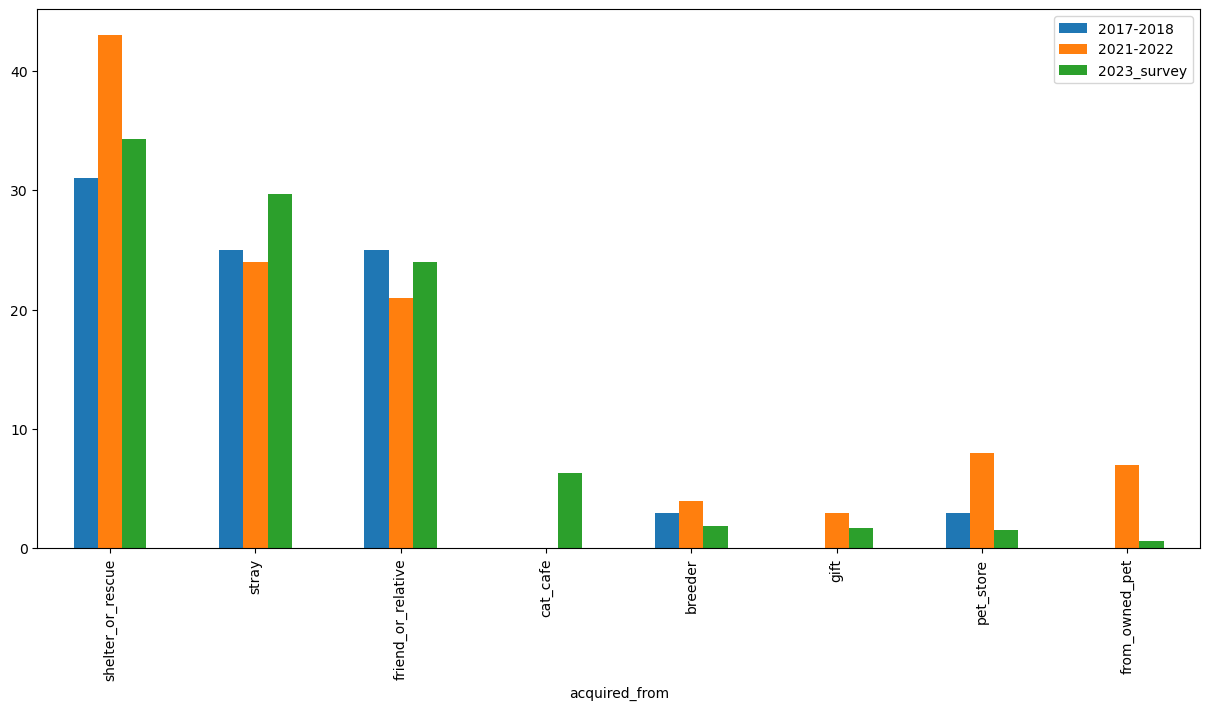

In [1296]:
acquired_summary.plot(
    x='acquired_from',
    y=['2017-2018', '2021-2022', '2023_survey'],
    kind='bar',
    figsize=(15, 7))

Our data is fairly consistent with the HumanePro data; this increases my confidence that we have a pretty representative sample of cat owners, and we should be able to make some valid predictions. It's also not surprising that shelter and rescue adoptions spiked in the 2021-2022 survey; this matches news headlines about pet adoption spikes when people were stuck at home, looking for companionship. Our survey data includes one category not included in the HumanePro data--cat cafe adoption. In my location, we have three well-known and well-respected cat cafes within a 90-minute radius. The businesses all pull cats from local shelters and rescues. Given this knowledge, our survey results seem like a valid representation of cat owners nationwide. 

So that we can use this new combined DataFrame in further reporting and visualization, let's save it back as a CSV.

In [1297]:
acquired_summary.to_csv('acquired_summary.csv')

## Step Five: Analyzing Survey Data

Let's try to find some trends and correlations between where a cat was adopted and its personality/behaviors.

In [1298]:
survey_df.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
0,0,Archie,cat_cafe,Adult,4,Orange tabby/orange tabby with white,15,9,7,6,3
1,1,Dax,cat_cafe,Junior,0,Orange tabby/orange tabby with white,9,10,7,9,8
2,2,Aylin,friend_or_relative,Junior,1,Calico,7,5,8,6,7
3,3,Ali,shelter_or_rescue,Mature,6,Tortoiseshell,15,2,7,3,5
4,3,Warner,shelter_or_rescue,Mature,6,Gray tuxedo gray and white,12,9,7,7,10


In [1299]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 0 to 476
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   family          475 non-null    int64 
 1   name            475 non-null    object
 2   acquired_from   475 non-null    object
 3   age             475 non-null    object
 4   home_duration   475 non-null    object
 5   color           475 non-null    object
 6   weight          462 non-null    Int64 
 7   socialness      475 non-null    int64 
 8   intelligence    475 non-null    int64 
 9   activity_level  475 non-null    int64 
 10  vocalization    475 non-null    int64 
dtypes: Int64(1), int64(5), object(5)
memory usage: 45.0+ KB


Just to go fishing, let's do some box plots for some of our categorical data to help us visually examine the trends.

In [1300]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='acquired_from', ylabel='vocalization'>

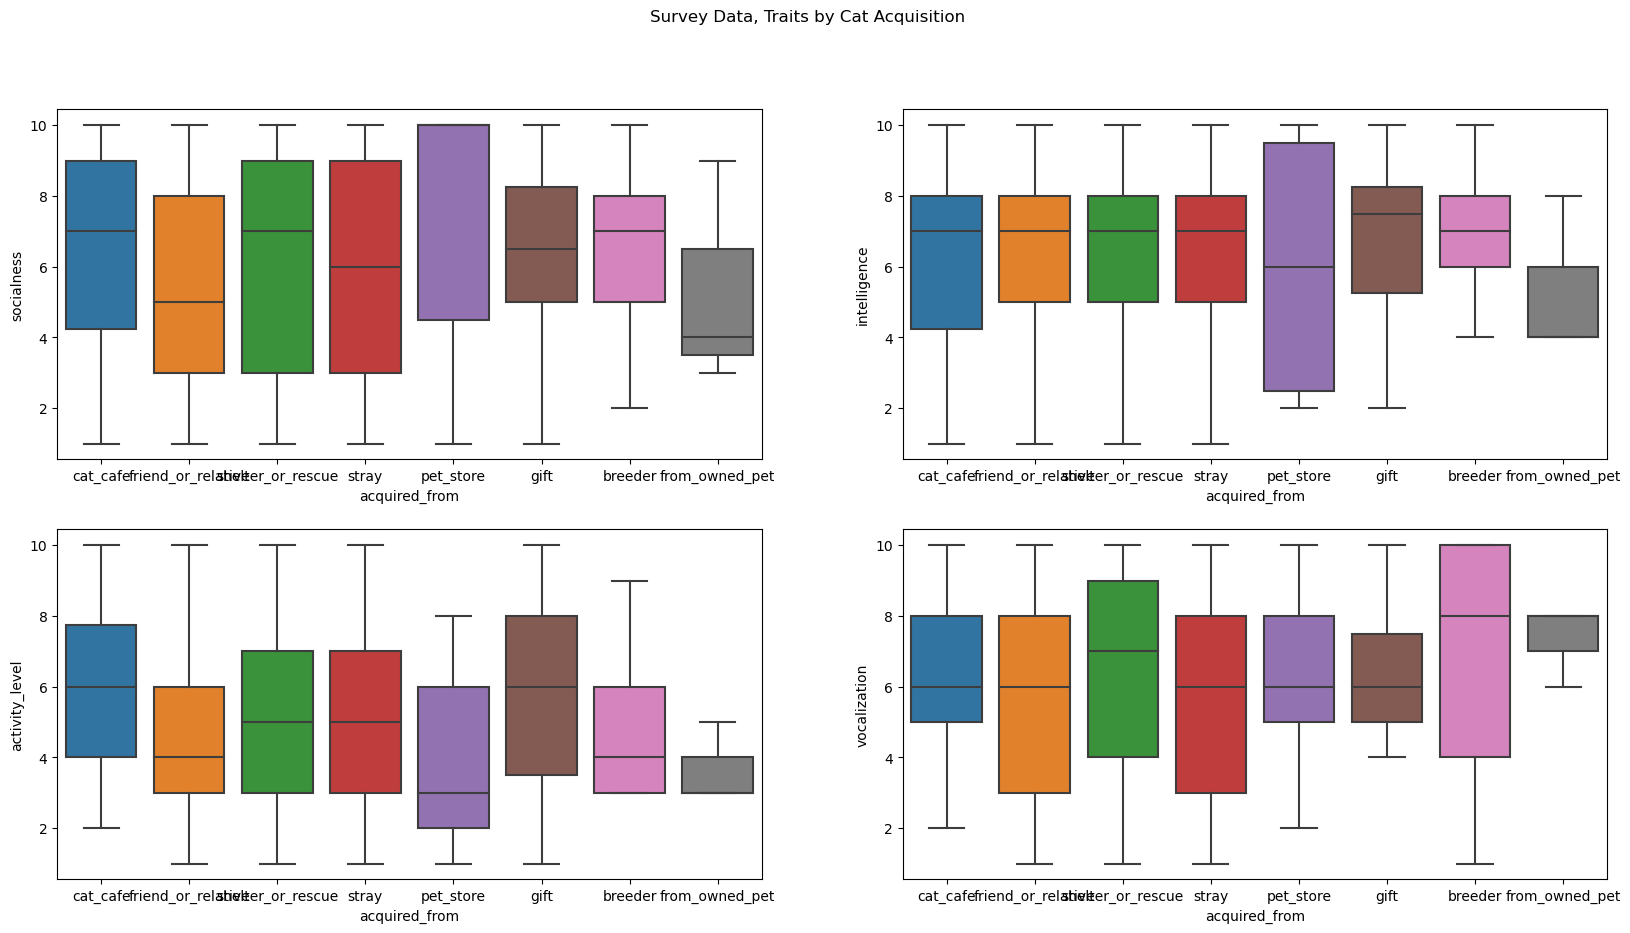

In [1301]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
fig.suptitle('Survey Data, Traits by Cat Acquisition')
sns.boxplot(ax=axes[0,0], data=survey_df, x='acquired_from', y='socialness')
sns.boxplot(ax=axes[0,1], data=survey_df, x='acquired_from', y='intelligence')
sns.boxplot(ax=axes[1,0], data=survey_df, x='acquired_from', y='activity_level')
sns.boxplot(ax=axes[1,1], data=survey_df, x='acquired_from', y='vocalization')

A few things jump out here. Pet store cats seem to rank higher in intelligence and socialness than other cats, cat cafe cats and cats procured as gifts seem to score higher for their activity level, and cats purchsed from breeders might just be more talkative.

Let's do a pivot table that shows our means for behavior values for all of our different acquisition choices.

In [1302]:
acquired_pivot = np.round(pd.pivot_table(data=survey_df, index=['acquired_from'], values=['socialness', 'intelligence',
                                'activity_level', 'vocalization']),2)
acquired_pivot

,activity_level,intelligence,socialness,vocalization
acquired_from,,,,
breeder,4.67,7.22,6.67,6.56
cat_cafe,5.77,6.30,6.53,6.27
friend_or_relative,4.67,6.33,5.54,5.54
from_owned_pet,3.67,5.33,5.33,7.33
gift,5.62,6.62,6.38,6.50
pet_store,4.00,6.00,7.14,6.29
shelter_or_rescue,5.29,6.91,6.02,6.26
stray,5.28,6.55,5.97,5.57


Now let's visualize that in a simple bar chart.

<Axes: title={'center': 'Cat Traits by Acquisition'}, ylabel='acquired_from'>

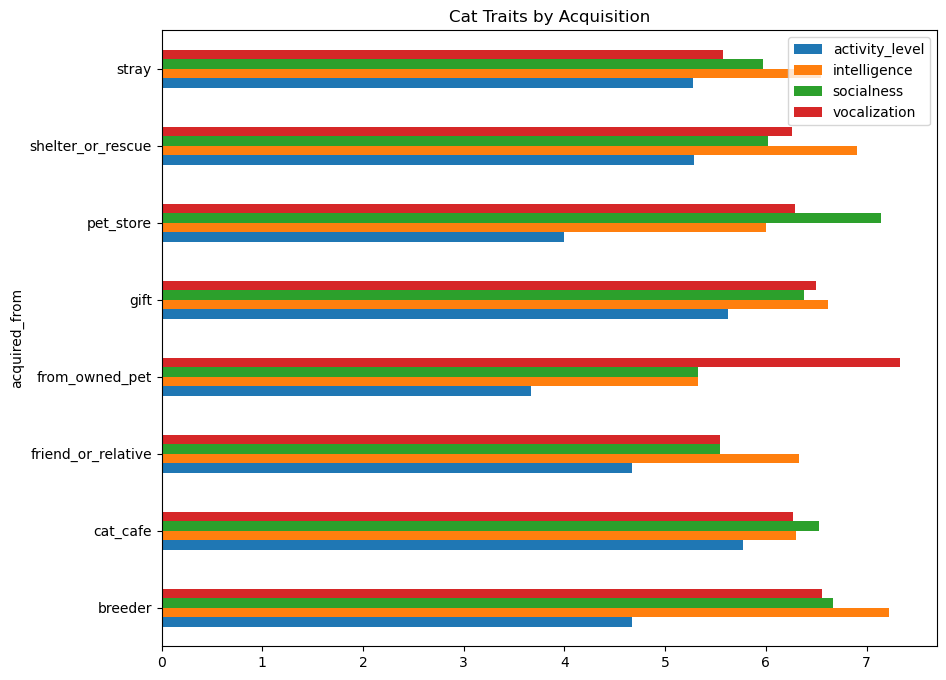

In [1303]:
np.round(pd.pivot_table(data=survey_df, index=['acquired_from'], values=['socialness', 'intelligence',
                                'activity_level', 'vocalization']),2).plot.barh(figsize=(10,8), 
                                title='Cat Traits by Acquisition')


And let's also transpose that pivot table to have another way of reading the numbers.

In [1304]:
acquired_pivot_transposed = acquired_pivot.T
acquired_pivot_transposed

acquired_from,breeder,cat_cafe,friend_or_relative,from_owned_pet,gift,pet_store,shelter_or_rescue,stray
activity_level,4.67,5.77,4.67,3.67,5.62,4.00,5.29,5.28
intelligence,7.22,6.30,6.33,5.33,6.62,6.00,6.91,6.55
socialness,6.67,6.53,5.54,5.33,6.38,7.14,6.02,5.97
vocalization,6.56,6.27,5.54,7.33,6.50,6.29,6.26,5.57


Our next step is to make a similar pivot table, but with coat color being the index. This will require a few more steps; we will need to do some filtering to get the cat's coat responses into columns on their own.

In [1305]:
survey_df.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
0,0,Archie,cat_cafe,Adult,4,Orange tabby/orange tabby with white,15,9,7,6,3
1,1,Dax,cat_cafe,Junior,0,Orange tabby/orange tabby with white,9,10,7,9,8
2,2,Aylin,friend_or_relative,Junior,1,Calico,7,5,8,6,7
3,3,Ali,shelter_or_rescue,Mature,6,Tortoiseshell,15,2,7,3,5
4,3,Warner,shelter_or_rescue,Mature,6,Gray tuxedo gray and white,12,9,7,7,10


In [1306]:
# check for unique values, choose which fields we want, filter my color

In [1307]:
print(survey_df.color.unique())

['Orange tabby/orange tabby with white' 'Calico' 'Tortoiseshell'
 'Gray tuxedo gray and white' 'Solid black'
 'Brown tabby/brown tabby with white' 'Classic tuxedo black and white'
 'Seal point' 'Gray tabby/gray tabby with white' 'ocicat tabby mix'
 'ocicat marble tabby mix' 'abyssian tabby mix'
 'Blonde with tabby markings on the head' 'Snowshoe Siamese ' 'Solid gray'
 'Solid white' 'Grey and white long hair' 'White with orange spots'
 'Tabby-tortie or torbie'
 'Red flame, orange tips on ears, orange strips on tail'
 'Grays, orange, white, no cat color fits her'
 'Black with brown/gray stripe marking, brown belly'
 'Black with white spots '
 'Belly, legs and bottom half of his body is white. His back and some of the sides of his body are black.'
 'Mostly white with black spots' 'Brown/orange/white Torby'
 'Part orange tabby, part calico' 'Cinnamon'
 'Chocolate tabby point Siamese '
 'Mostly white with a few large brown spots including a heart on shoulder'
 'She is a calico and a tabby 

In [1308]:
orange_tabby = survey_df[survey_df['color'].str.contains('Orange tabby/orange tabby with white')]
orange_tabby.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
0,0,Archie,cat_cafe,Adult,4,Orange tabby/orange tabby with white,15,9,7,6,3
1,1,Dax,cat_cafe,Junior,0,Orange tabby/orange tabby with white,9,10,7,9,8
11,8,Finn,shelter_or_rescue,Adult,51/2 years,Orange tabby/orange tabby with white,6,5,5,9,5
21,9,Alex,stray,Kitten,0,Orange tabby/orange tabby with white,2,9,6,10,2
37,15,Nacho,friend_or_relative,Adult,3 years,Orange tabby/orange tabby with white,13,2,3,5,5


In [1309]:
orange_pivot = np.round(pd.pivot_table(orange_tabby, index=['color'], values=['weight', 'socialness', 'intelligence', 
                                                                     'activity_level', 'vocalization']),2)
orange_pivot

,activity_level,intelligence,socialness,vocalization,weight
color,,,,,
Orange tabby/orange tabby with white,5.32,6.1,6.51,6.07,11.73


In [1310]:
calico = survey_df[survey_df['color'].str.contains('Calico')]
calico.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
2,2,Aylin,friend_or_relative,Junior,1,Calico,7,5,8,6,7
8,7,Claire,shelter_or_rescue,Senior,14,Calico,13,10,8,3,8
23,10,Pandora,stray,Adult,6,Calico,14,3,9,2,2
29,15,Cupcake,stray,Senior,14,Calico,12,4,8,3,5
50,23,Leia,shelter_or_rescue,Mature,9,Calico,15,10,8,6,5


In [1311]:
calico_pivot = np.round(pd.pivot_table(calico, index=['color'], values=['weight', 'socialness', 'intelligence', 
                                                                     'activity_level', 'vocalization']),2)
calico_pivot

,activity_level,intelligence,socialness,vocalization,weight
color,,,,,
Calico,4.68,6.76,4.43,5.11,10.03


In [1312]:
tortoiseshell = survey_df[survey_df['color'].str.contains('Tortoiseshell')]
tortoiseshell.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
3,3,Ali,shelter_or_rescue,Mature,6,Tortoiseshell,15,2,7,3,5
14,9,Lucy,shelter_or_rescue,Mature,10,Tortoiseshell,11,6,9,2,8
30,16,August,friend_or_relative,Junior,1,Tortoiseshell,8,10,7,6,7
31,13,Ashliegh,friend_or_relative,Adult,5 years,Tortoiseshell,10,2,4,1,2
33,16,Kali,friend_or_relative,Junior,1,Tortoiseshell,10,4,8,7,6


In [1313]:
tortie_pivot = np.round(pd.pivot_table(tortoiseshell, index=['color'], values=['weight', 'socialness', 'intelligence', 
                                                                     'activity_level', 'vocalization']),2)
tortie_pivot

,activity_level,intelligence,socialness,vocalization,weight
color,,,,,
Tortoiseshell,5.06,6.88,5.61,6.3,9.72


In [1314]:
gray_tux = survey_df[survey_df['color'].str.contains('Gray tuxedo gray and white')]
gray_tux.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
4,3,Warner,shelter_or_rescue,Mature,6,Gray tuxedo gray and white,12,9,7,7,10
40,19,Linus,friend_or_relative,Adult,6,Gray tuxedo gray and white,20,6,8,3,8
47,25,Nutcase,shelter_or_rescue,Senior,10,Gray tuxedo gray and white,12,7,8,6,6
94,50,Byther,stray,Adult,2 years,Gray tuxedo gray and white,<NA>,10,8,5,6
115,63,LUNA,shelter_or_rescue,Adult,2 .5 years,Gray tuxedo gray and white,<NA>,4,9,3,10


In [1315]:
gray_tux_pivot = np.round(pd.pivot_table(gray_tux, index=['color'], values=['weight', 'socialness', 'intelligence', 
                                                                     'activity_level', 'vocalization']),2)
gray_tux_pivot

,activity_level,intelligence,socialness,vocalization,weight
color,,,,,
Gray tuxedo gray and white,4.61,6.44,5.67,5.67,10.8


In [1316]:
solid_black = survey_df[survey_df['color'].str.contains('Solid black')]
solid_black.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
5,4,Cleo,friend_or_relative,Super Senior,16,Solid black,8,4,6,2,3
20,10,Spooky,stray,Junior,2,Solid black,5,8,8,9,5
24,11,Luna,friend_or_relative,Adult,4 yrs,Solid black,10,7,6,4,5
26,12,Sam,shelter_or_rescue,Senior,13,Solid black,7,3,8,3,3
32,14,Luci Fur,stray,Mature,9,Solid black,3,2,2,3,6


In [1317]:
solid_black_pivot = np.round(pd.pivot_table(solid_black, index=['color'], values=['weight', 'socialness', 'intelligence', 
                                                                     'activity_level', 'vocalization']),2)
solid_black_pivot

,activity_level,intelligence,socialness,vocalization,weight
color,,,,,
Solid black,5.72,6.54,6.28,6.25,10.85


In [1318]:
brown_tabby = survey_df[survey_df['color'].str.contains('Brown tabby/brown tabby with white')]
brown_tabby.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
6,5,Cinnamon,shelter_or_rescue,Adult,3 years,Brown tabby/brown tabby with white,8,8,6,7,9
7,6,Patti LaBelle,shelter_or_rescue,Adult,2,Brown tabby/brown tabby with white,13,5,8,4,10
12,8,Rip,stray,Adult,2 years,Brown tabby/brown tabby with white,16,10,8,7,6
25,12,Phil,stray,Senior,12,Brown tabby/brown tabby with white,9,10,10,5,5
39,18,Eli,friend_or_relative,Mature,1,Brown tabby/brown tabby with white,15,8,8,3,1


In [1319]:
brown_tabby_pivot = np.round(pd.pivot_table(brown_tabby, index=['color'], values=['weight', 'socialness', 'intelligence', 
                                                                     'activity_level', 'vocalization']),2)
brown_tabby_pivot

,activity_level,intelligence,socialness,vocalization,weight
color,,,,,
Brown tabby/brown tabby with white,4.66,6.54,5.75,5.91,11.59


In [1320]:
tux = survey_df[survey_df['color'].str.contains('Classic tuxedo black and white')]
tux.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
9,8,Charlie,stray,Mature,10 years,Classic tuxedo black and white,16,10,3,2,1
13,8,Sushi,stray,Adult,1 1/2 years,Classic tuxedo black and white,8,4,9,10,5
18,9,Aiva,stray,Adult,4,Classic tuxedo black and white,7,4,8,10,2
42,21,Plume,friend_or_relative,Adult,3,Classic tuxedo black and white,10,4,6,4,2
44,22,Teddy,shelter_or_rescue,Adult,1 year,Classic tuxedo black and white,12,8,9,5,7


In [1321]:
tux_pivot = np.round(pd.pivot_table(tux, index=['color'], values=['weight', 'socialness', 'intelligence', 
                                                                     'activity_level', 'vocalization']),2)
tux_pivot

,activity_level,intelligence,socialness,vocalization,weight
color,,,,,
Classic tuxedo black and white,5.84,7.14,6.18,6,11.43


In [1322]:
seal_point = survey_df[survey_df['color'].str.contains('Seal point')]
seal_point.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
10,8,Bella,stray,Mature,7 years,Seal point,7,8,9,4,10
28,14,Nicholas ( Nicky Meownaj),friend_or_relative,Mature,10,Seal point,8,5,9,5,4
95,51,Ratmask,shelter_or_rescue,Senior,11,Seal point,9,4,5,8,10
116,64,Gracie,breeder,Adult,4,Seal point,8,6,10,9,10
129,73,Kit,stray,Senior,12,Seal point,12,10,7,2,1


In [1323]:
seal_point_pivot = np.round(pd.pivot_table(seal_point, index=['color'], values=['weight', 'socialness', 'intelligence', 
                                                                     'activity_level', 'vocalization']),2)
seal_point_pivot

,activity_level,intelligence,socialness,vocalization,weight
color,,,,,
Seal point,4.67,7.42,7.42,7.42,10.58


In [1324]:
gray_tabby = survey_df[survey_df['color'].str.contains('Gray tabby/gray tabby with white')]
gray_tabby.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
15,9,Oliver,stray,Adult,6,Gray tabby/gray tabby with white,13,2,3,5,4
59,29,Koda Bear,stray,Adult,6 years,Gray tabby/gray tabby with white,12,10,7,3,10
62,12,Mitzi,shelter_or_rescue,Senior,12,Gray tabby/gray tabby with white,12,7,5,1,1
68,32,Kermit,shelter_or_rescue,Adult,4 years,Gray tabby/gray tabby with white,20,5,5,1,6
82,41,Diego,cat_cafe,Adult,3,Gray tabby/gray tabby with white,15,8,8,9,7


In [1325]:
gray_tabby_pivot = np.round(pd.pivot_table(gray_tabby, index=['color'], values=['weight', 'socialness', 'intelligence', 
                                                                     'activity_level', 'vocalization']),2)
gray_tabby_pivot

,activity_level,intelligence,socialness,vocalization,weight
color,,,,,
Gray tabby/gray tabby with white,4.75,6.74,6.21,5.61,13.17


In [1326]:
solid_gray = survey_df[survey_df['color'].str.contains('Solid gray')]
solid_gray.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
38,18,Ozzie,shelter_or_rescue,Junior,1,Solid gray,9,10,3,7,8
46,24,Arlo Davy Guthrie,shelter_or_rescue,Junior,1,Solid gray,8,7,5,9,3
49,24,Woodrow Wilson Guthrie,shelter_or_rescue,Junior,1,Solid gray,11,3,7,3,3
67,31,"Bendy aka Bendy-Boo, BendyKitty",friend_or_relative,Adult,4 years,Solid gray,15,3,4,2,2
69,33,Rowdy,friend_or_relative,Adult,3,Solid gray,12,7,8,8,3


In [1327]:
solid_gray_pivot = np.round(pd.pivot_table(solid_gray, index=['color'], values=['weight', 'socialness', 'intelligence', 
                                                                     'activity_level', 'vocalization']),2)
solid_gray_pivot

,activity_level,intelligence,socialness,vocalization,weight
color,,,,,
Solid gray,5.26,6.26,5.68,5.53,11.5


In [1328]:
solid_white = survey_df[survey_df['color'].str.contains('Solid white')]
solid_white.head()

,family,name,acquired_from,age,home_duration,color,weight,socialness,intelligence,activity_level,vocalization
53,12,Cloudy,friend_or_relative,Senior,12,Solid white,15,8,6,7,2
65,30,Lyla,shelter_or_rescue,Senior,13,Solid white,13,1,8,1,5
217,126,Mork,friend_or_relative,Adult,7,Solid white,6,2,8,5,8
265,151,LILY,shelter_or_rescue,Mature,7,Solid white,14,6,10,5,10
281,160,Savannah,shelter_or_rescue,Mature,7,Solid white,12,1,9,2,9


In [1329]:
solid_white_pivot = np.round(pd.pivot_table(solid_white, index=['color'], values=['weight', 'socialness', 'intelligence', 
                                                                     'activity_level', 'vocalization']),2)
solid_white_pivot

,activity_level,intelligence,socialness,vocalization,weight
color,,,,,
Solid white,4.4,6.6,5.8,6.8,11.5


In [1332]:
color_summary = pd.concat([orange_pivot, calico_pivot, tux_pivot,tortie_pivot, gray_tux_pivot, solid_black_pivot, brown_tabby_pivot,
                           tux_pivot, seal_point_pivot, gray_tabby_pivot, solid_gray_pivot, solid_white_pivot])
color_summary

,activity_level,intelligence,socialness,vocalization,weight
color,,,,,
Orange tabby/orange tabby with white,5.32,6.10,6.51,6.07,11.73
Calico,4.68,6.76,4.43,5.11,10.03
Classic tuxedo black and white,5.84,7.14,6.18,6.00,11.43
Tortoiseshell,5.06,6.88,5.61,6.30,9.72
Gray tuxedo gray and white,4.61,6.44,5.67,5.67,10.8
Solid black,5.72,6.54,6.28,6.25,10.85
Brown tabby/brown tabby with white,4.66,6.54,5.75,5.91,11.59
Classic tuxedo black and white,5.84,7.14,6.18,6.00,11.43
Seal point,4.67,7.42,7.42,7.42,10.58
